**1. Importing the dependencies**

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")

**2. Data Loadiing and EDA**

In [297]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [298]:
df.shape

(7043, 21)

In [299]:
pd.set_option("display.max_columns",None)

In [300]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [302]:
df=df.drop(columns=['customerID'])

In [303]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [304]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [305]:
# printing unique values in categorical columns
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']

for col in df.columns:
    if col not in numerical_columns:
        print(col,df[col].unique())
        print("-"*100)

gender ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen [0 1]
----------------------------------------------------------------------------------------------------
Partner ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Dependents ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------

In [306]:
#Check the na values in each columns and total
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [307]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [308]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [309]:
df['TotalCharges']=df['TotalCharges'].replace({" ":"0.0"})

In [310]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [311]:
#Checking the output variable distribution and its imbalances
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**Insights:**
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target

In [312]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**3.Understand the distribution of numerical features**

In [313]:
def histogram_plot(df,colname):
    plt.figure(figsize=(8,6))
    sns.histplot(df[colname],kde=True)
    plt.title(f"Distribution of {colname}")

     # calculate the mean and median values for the columns
    col_median=df[colname].median()
    col_mean=df[colname].mean()

    # add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")

    plt.legend()
    plt.show()

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_plots_in_line(df, colnames, figsize=(18, 6), palette='pastel'):
    """
    Plot histogramplots for the specified columns in a single row (3 columns by default).

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing your data.
    colnames : list of str
        List of column names to plot. Ideally length 3 for a three‑column layout.
    figsize : tuple, optional
        Overall figure size (width, height), by default (18, 6).
    palette : str or list, optional
        Seaborn palette for the boxes, by default 'pastel'.
    showfliers : bool, optional
        Whether to show outliers, by default True.
    """
    sns.set_style("whitegrid")

    n = len(colnames)
    fig, axes = plt.subplots(1, n, figsize=figsize, squeeze=False)
    axes = axes.flatten()

    for ax, col in zip(axes, colnames):
        sns.histplot(df[col],kde=True,ax=ax)
        plt.title(f"Distribution of {col}")
        ax.set_title(f'Box Plot: {col}')
        ax.set_xlabel('')
        ax.set_ylabel(col)
        # calculate the mean and median values for the columns
        col_median=df[col].median()
        col_mean=df[col].mean()

        # add vertical lines for mean and median
        ax.axvline(col_mean, color="red", linestyle="--", label="Mean")
        ax.axvline(col_median, color="green", linestyle="-", label="Median")

    plt.tight_layout()
    plt.show()

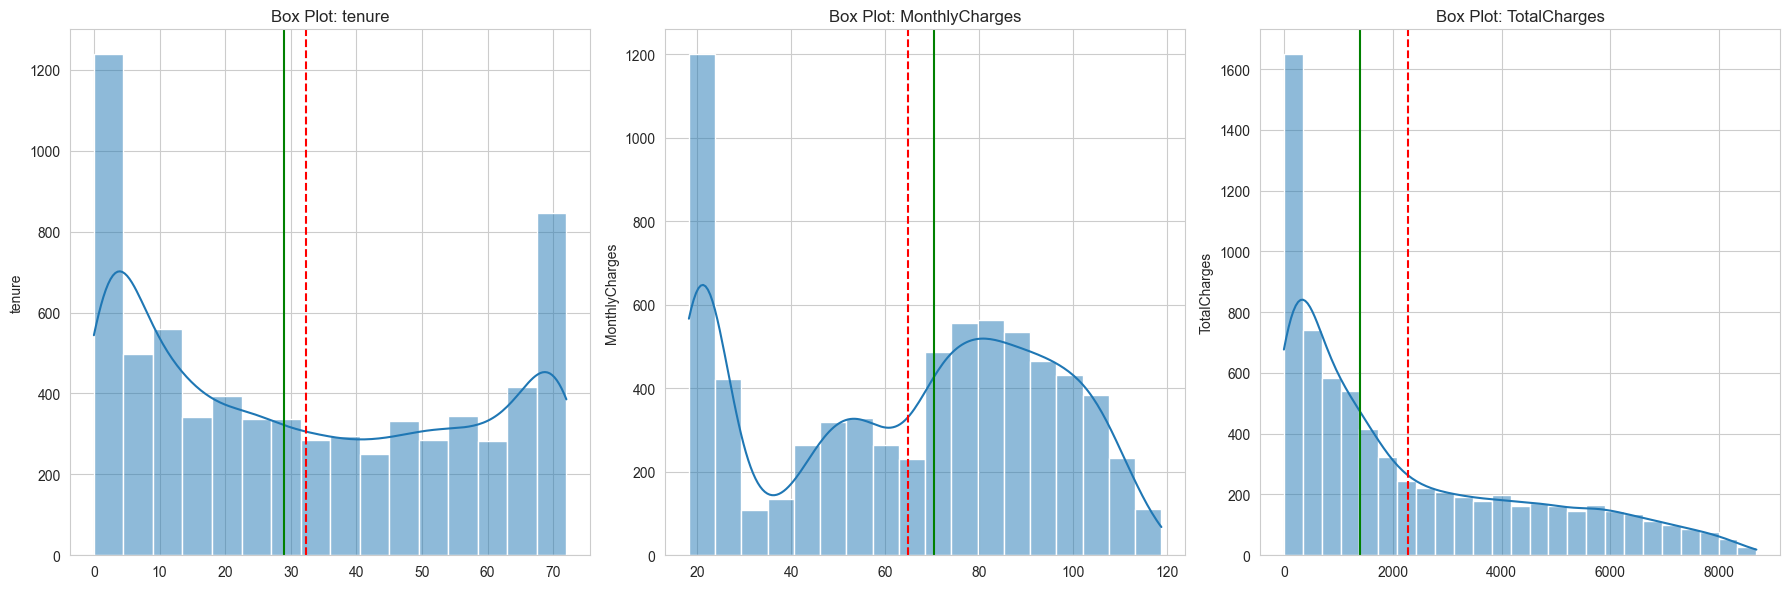

In [315]:
histogram_plots_in_line(df, ['tenure', 'MonthlyCharges', 'TotalCharges'])

**4.Box Plot to determine Outliers**

In [316]:
def box_plot(df,colname):
    plt.figure(figsize=(8,6))
    sns.boxplot(y=df[colname])
    plt.title('Box Plot for ' + colname)
    plt.legend()
    plt.show()

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plots_in_line(df, colnames, figsize=(18, 6), palette='pastel', showfliers=True):
    """
    Plot boxplots for the specified columns in a single row (3 columns by default).

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing your data.
    colnames : list of str
        List of column names to plot. Ideally length 3 for a three‑column layout.
    figsize : tuple, optional
        Overall figure size (width, height), by default (18, 6).
    palette : str or list, optional
        Seaborn palette for the boxes, by default 'pastel'.
    showfliers : bool, optional
        Whether to show outliers, by default True.
    """
    sns.set_style("whitegrid")

    n = len(colnames)
    fig, axes = plt.subplots(1, n, figsize=figsize, squeeze=False)
    axes = axes.flatten()

    for ax, col in zip(axes, colnames):
        sns.boxplot(
            data=df,
            y=col,            
            showfliers=showfliers,
            ax=ax
        )
        ax.set_title(f'Box Plot: {col}')
        ax.set_xlabel('')
        ax.set_ylabel(col)

    plt.tight_layout()
    plt.show()


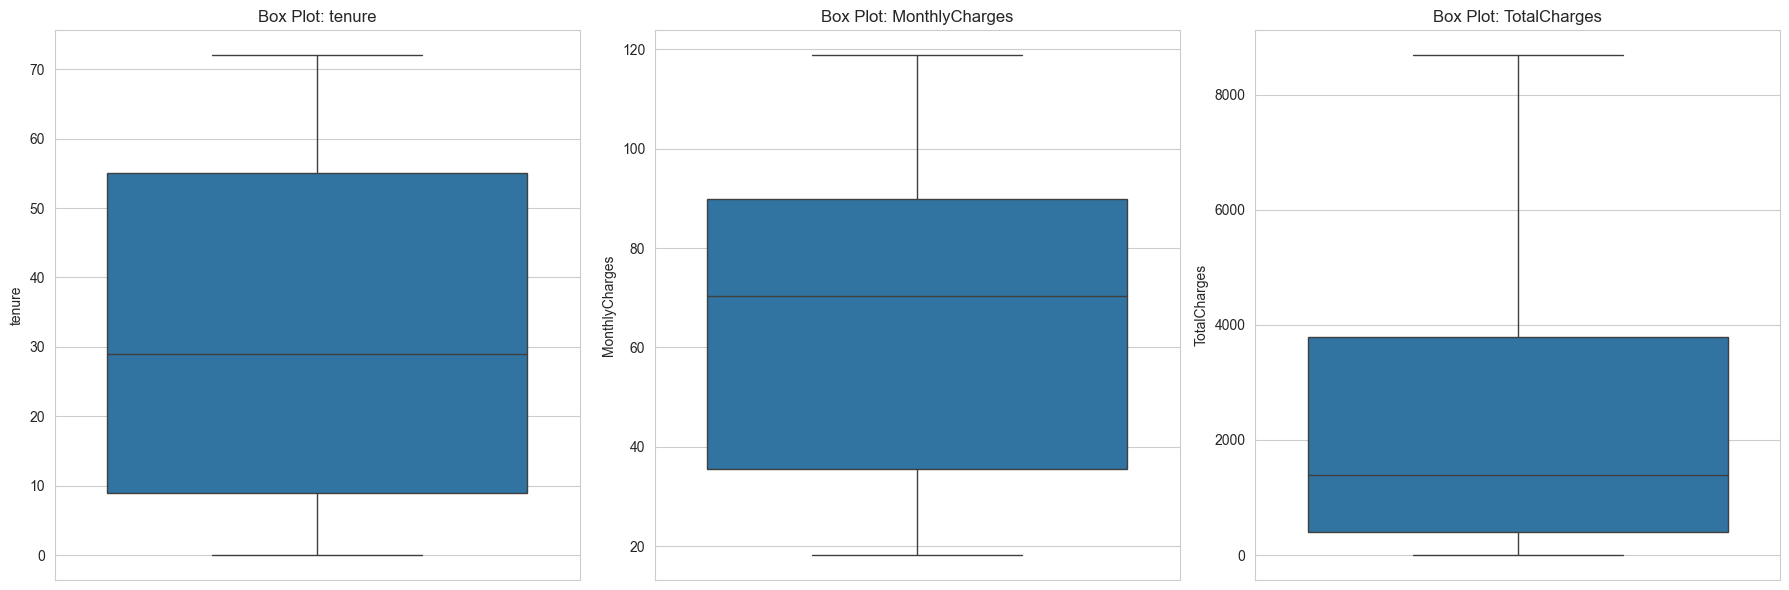

In [318]:
box_plots_in_line(df, ['tenure', 'MonthlyCharges', 'TotalCharges'])

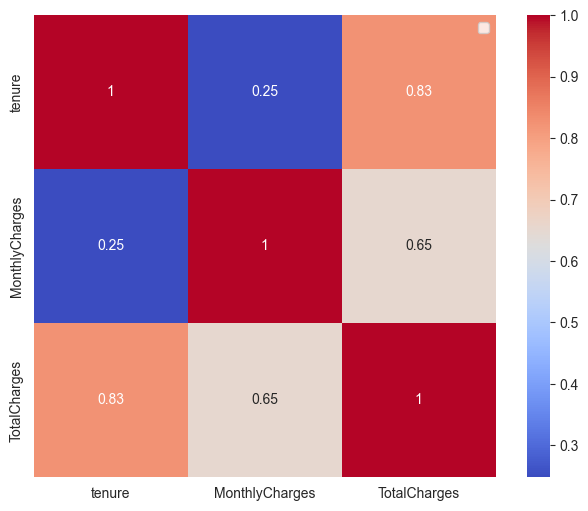

In [319]:
# Correlation Heat Map for Numerical Columns
plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', square=True)
plt.legend()
plt.show()

In [320]:
#Count Plot for Categorical Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [321]:
categorical_columns=df.select_dtypes(include='object').columns.to_list()
categorical_columns=['SeniorCitizen'] + categorical_columns
categorical_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

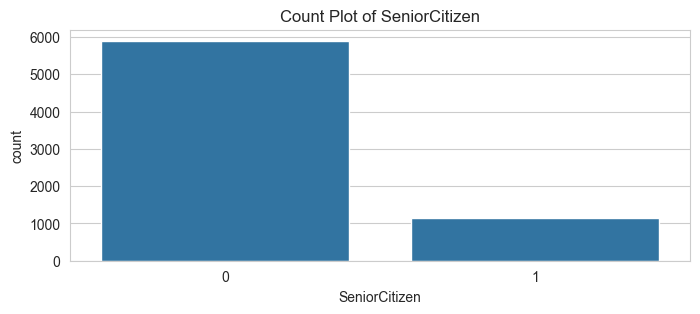

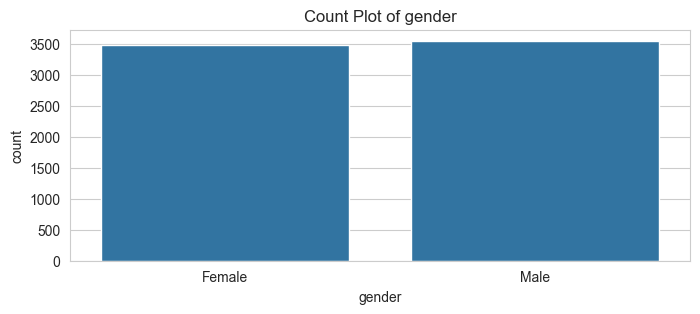

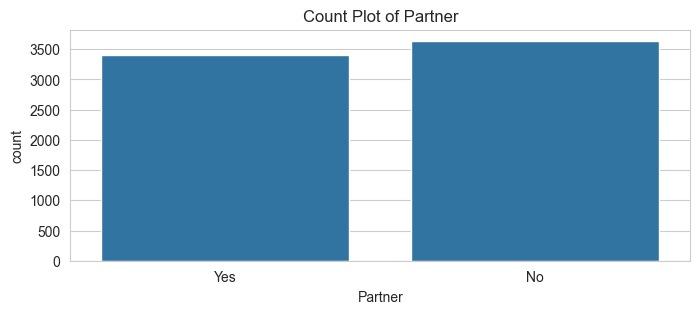

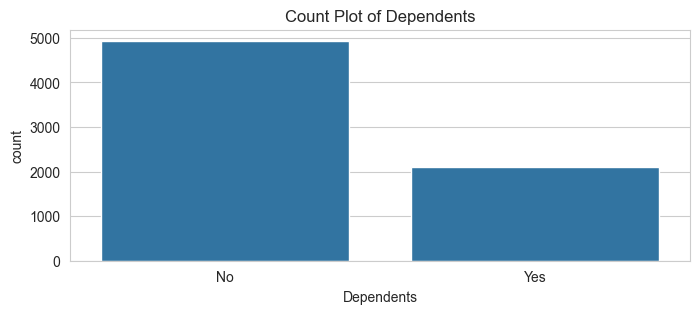

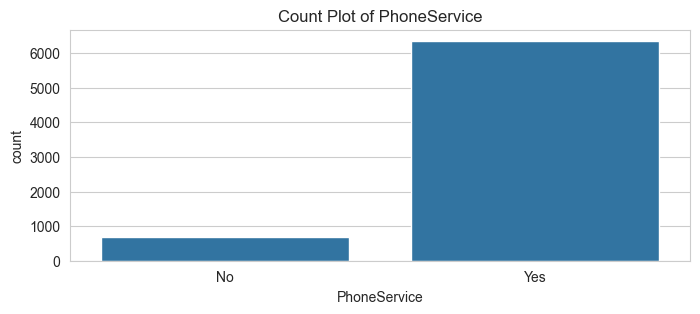

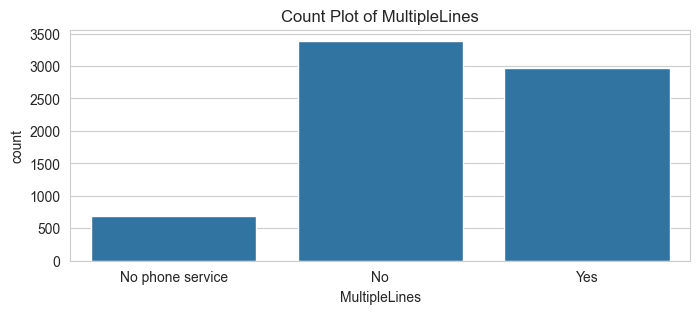

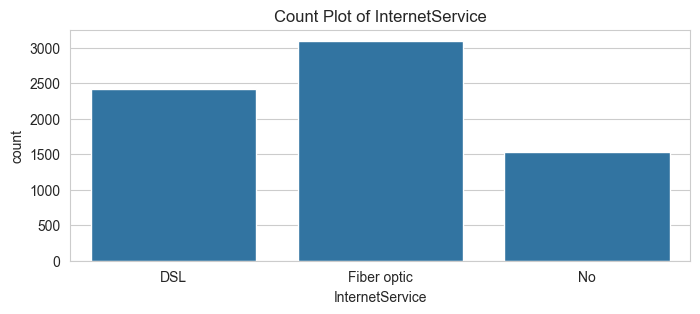

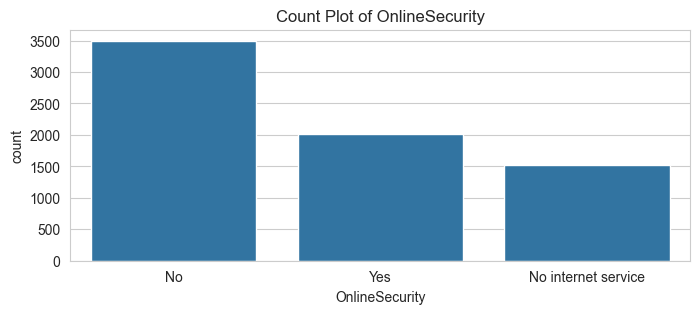

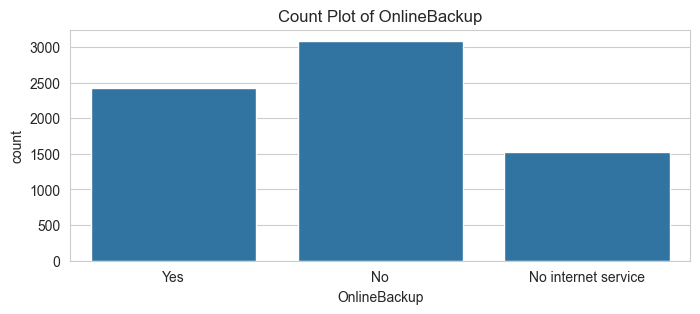

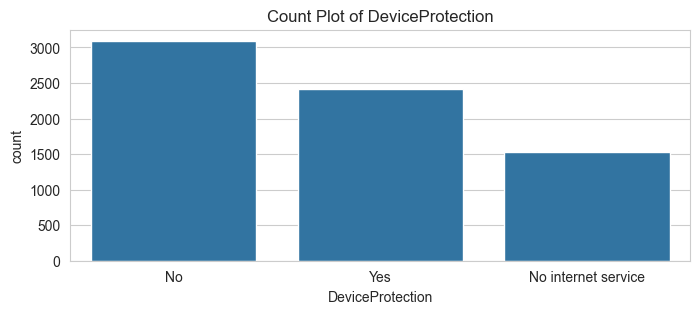

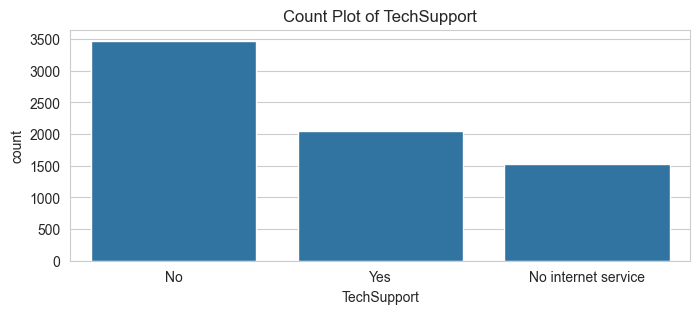

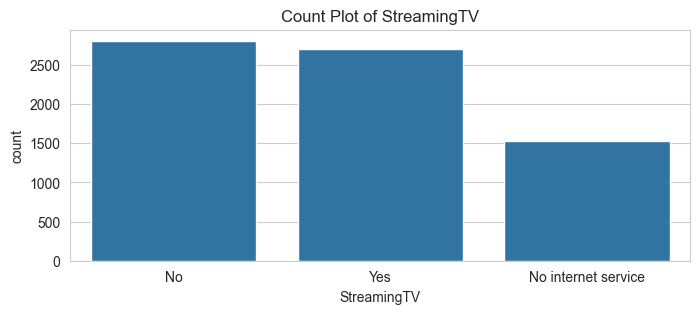

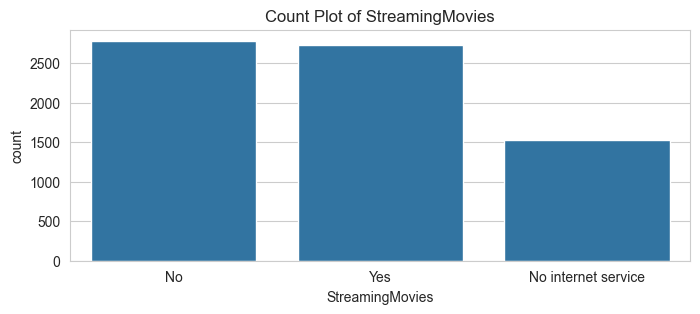

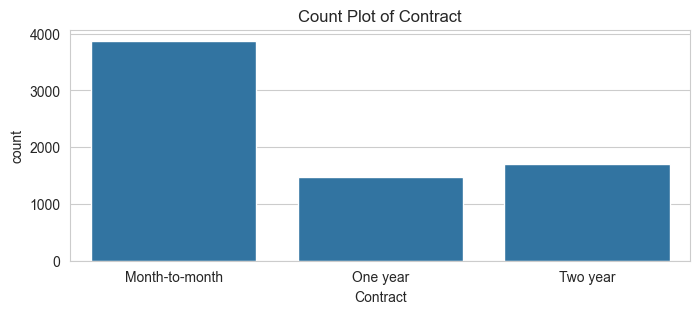

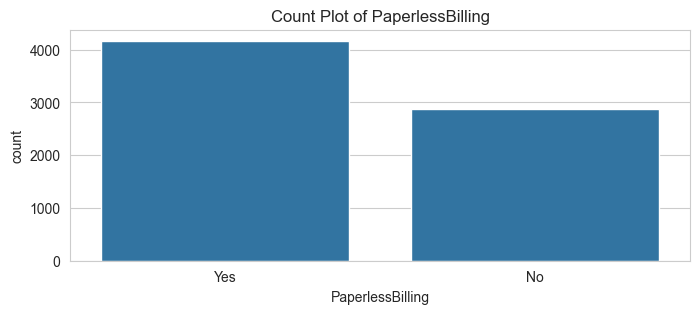

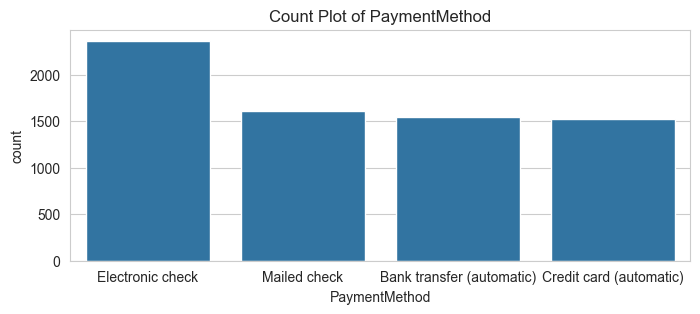

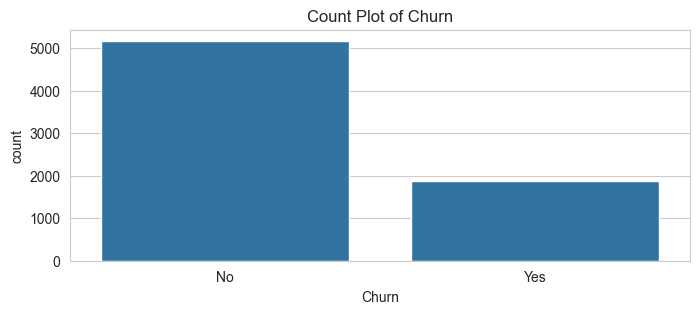

In [322]:
for col in categorical_columns:
    plt.figure(figsize=(8,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.show()


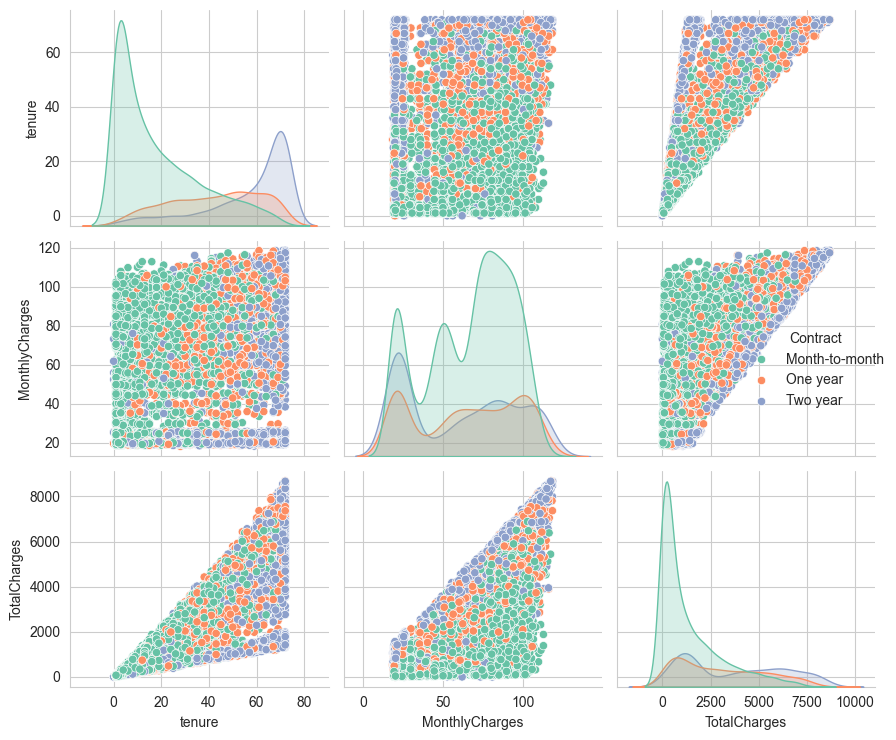

In [323]:
#Pair Plot
import seaborn
sns.set_style("whitegrid")
sns.pairplot(
    df,
    vars=['tenure', 'MonthlyCharges', 'TotalCharges'],
    hue='Contract',
    diag_kind='kde',        # or 'kde'
    palette='Set2',          # any seaborn palette
    height=2.5               # size of each subplot
)
plt.tight_layout()
plt.show()

In [324]:
#Data PreProcessing
# Label Encoding of Target Columns
df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})

In [325]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [326]:
#Label Encoding of Categorical Columns
object_columns= df.select_dtypes(include=['object']).columns.tolist()
print(object_columns)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [327]:
encoders={}

for col in object_columns:
    label_encoder=LabelEncoder()
    df[col]=label_encoder.fit_transform(df[col])
    encoders[col]=label_encoder

#save the encoders to pickle file
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [328]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [329]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [330]:
#Test and Train Split
x=df.drop(columns='Churn')
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


In [331]:
print(y_train.shape,y_test.shape)

(5634,) (1409,)


In [332]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [333]:
#SMOTE technique for oversampling the minority class
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(x_train,y_train)
print(y_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [334]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForest'      : RandomForestClassifier(random_state=42),
    'XGBoost'           : XGBClassifier(random_state=42),
    'LightGBM'          : LGBMClassifier(random_state=42)
}

In [335]:
#Lets Perform Cross Validation
cv_results={}

for model_name,model in models.items():
    print(f"Training {model_name} with default parameters")
    crossvalscore=cross_val_score(model,x_smote,y_smote,cv=5,scoring="accuracy")
    cv_results[model_name]=crossvalscore
    print(f"{model_name} cross-validation accuracy: {np.mean(crossvalscore):.2f}")
    print("-"*70)

    

Training LogisticRegression with default parameters
LogisticRegression cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training RandomForest with default parameters
RandomForest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------
Training LightGBM with default parameters
[LightGBM] [Info] Number of positive: 3310, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 6620, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.

In [336]:
cv_results

{'LogisticRegression': array([0.74033816, 0.74984894, 0.80483384, 0.79697885, 0.83021148]),
 'RandomForest': array([0.73067633, 0.77039275, 0.90392749, 0.89969789, 0.90030211]),
 'XGBoost': array([0.70833333, 0.76132931, 0.90453172, 0.88821752, 0.90755287]),
 'LightGBM': array([0.71316425, 0.75951662, 0.90332326, 0.88761329, 0.90453172])}

In [337]:
rfc=RandomForestClassifier(random_state=42)

In [338]:
rfc.fit(x_smote,y_smote)

RandomForestClassifier(random_state=42)

In [339]:
#Model Evaluation
y_pred=rfc.predict(x_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score:
 0.7785663591199432
Confsuion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [340]:
#save the model data into pkl file
model_data={"model":rfc,"features_names":x.columns.to_list()}
model_data

{'model': RandomForestClassifier(random_state=42),
 'features_names': ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges']}

In [341]:
with open("customer_churn_model.pkl","wb") as f:
    pickle.dump(model_data,f)

In [342]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics         import roc_auc_score

param_dist = {  
    'RandomForest': {
        'n_estimators'   : [100,200,300],
        'max_depth'      : [None, 10,20],
        'min_samples_split': [2,5],
        'min_samples_leaf' : [1,2],
        'max_features'   : ['sqrt','log2']
    }
   }

# -- 4) Stratified K‑Fold CV setup --
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -- 5) Hyperparameter tuning + overfitting check + model selection metrics --
results = []
search = RandomizedSearchCV(
        estimator         = rfc,
        param_distributions = param_dist['RandomForest'],
        n_iter            = 20,
        scoring           = 'roc_auc',
        cv                = cv,
        random_state      = 42,
        n_jobs            = -1
    )
search.fit(x_smote, y_smote)
best = search.best_estimator_
    
train_auc = roc_auc_score(y_smote, best.predict_proba(x_smote)[:,1])
cv_auc    = cross_val_score(best, x_smote, y_smote, cv=cv, scoring='roc_auc').mean()
test_auc  = roc_auc_score(y_test, best.predict_proba(x_test)[:,1])

y_pred=best.predict(x_test)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
  
results.append({
        'Model'       : 'RandomForest',
        'Best_Params' : search.best_params_,
        'Train_AUC'   : train_auc,
        'CV_AUC'      : cv_auc,
        'Test_AUC'    : test_auc,
        'Accuracy'    : accuracy_score(y_test, y_pred)
    })

# Summarize
results_df = pd.DataFrame(results).sort_values('Test_AUC', ascending=False)
print(results_df['Best_Params'])

Accuracy Score:
 0.7764371894960965
0    {'n_estimators': 300, 'min_samples_split': 2, ...
Name: Best_Params, dtype: object


In [343]:
# 7. Load the saved  model and  build a Predictive System**

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [344]:
model_data

{'model': RandomForestClassifier(random_state=42),
 'features_names': ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges']}

In [345]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

In [346]:
# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.79 0.21]]
